<a href="https://colab.research.google.com/github/sg2083/independent_study/blob/main/Sentiment_analysis_26_2_wip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of Stock-Related News & Posts and Predicting Stock Market Prices

### Introduction
The stock market is highly influenced by investor sentiment, which is often reflected in news articles, social media discussions, and online forums. This study focuses on analyzing the sentiment of stock-related posts from multiple sources, including Reddit, NewsAPI, and historical stock prices.

The goal is to determine whether online sentiment correlates with stock price movements and if it can be used as a predictive feature for stock performance.

## Research Questions
1. Does investor sentiment expressed in Reddit posts and news articles correlate with stock price movements for Tesla?
2. Can sentiment data extracted from online platforms be used to predict stock price trends in the short term?
3. What is the relative significance of different sentiment sources (Reddit vs. NewsAPI) in predicting stock market performance?
4. How does sentiment change in response to major news events, and does this sentiment shift correlate with subsequent stock price movements?

##Hypotheses
>**H1**:There is a significant positive correlation between positive sentiment in Reddit posts/news articles and an increase in Tesla's stock price.<br>
**H2**: Negative sentiment in Reddit posts/news articles is significantly correlated with a decrease in Tesla's stock price.<br>
**H3**: Sentiment data from Reddit is more predictive of short-term stock price fluctuations than sentiment data from news articles.<br>
**H4**: Major news events (e.g., product launches, regulatory announcements) cause a significant shift in sentiment, which is reflected in short-term stock price movements.

## Literature Review
The study by Nti, Adekoya, and Weyori (2020) investigates how public sentiment, derived from web news, Twitter, Google Trends, and forum discussions, influences stock market predictions. Using sentiment analysis with an Artificial Neural Network (ANN) model, the authors predict stock prices on the Ghana Stock Exchange (GSE) over time frames of 1 to 90 days. They find that combining multiple data sources improves prediction accuracy, with the highest accuracy (70.66–77.12%) achieved from a combined dataset. The study highlights a strong link between stock market behavior and social media, suggesting that sentiment data from online platforms can help investors predict future stock price movements and make better investment decisions.
link: https://sciendo.com/article/10.2478/acss-2020-0004

## How its different from whats already been done
Event-Driven Sentiment Evolution and Its Impact on Stock Price Prediction

### Data
The data for this study is collected from three primary sources: **Reddit, NewsAPI, and stock market data**. Reddit posts related to **Tesla** stock are retrieved using praw library from financial discussion subreddits like r/wallstreetbets, capturing post titles and timestamps. News articles mentioning Tesla are obtained via NewsAPI, extracting headlines, publication dates, and sources. Historical stock price data is being sourced from Yahoo Finance api, including daily open, high, low, close prices, trading volume, and other financial indicators.

Since these datasets originate from different platforms, they contain varying timestamp formats, time zones, and missing values, requiring careful preprocessing and merging to align sentiment data with stock price movements for further analysis.

### Data Preprocessing
The collected data is being cleaned and standardized before merging. Steps include:

1. Date Format Standardization

  * Convert timestamps from different time zones to UTC
  * Convert stock market timestamps (which include hours/minutes) to date-only format

2. Column Renaming for Clarity

  * Title → title_reddit (for Reddit)
  * Title → title_news (for NewsAPI)
  
  This prevents column name conflicts

3. Handling Missing Data

  * Some dates lack both Reddit posts and news articles
  * Missing values must be carefully handled to avoid bias

4. Merging Data

  Outer join used to keep all records from Reddit, NewsAPI, and stock price data Ensures no loss of important data points Note: Since data comes from multiple sources, preprocessing is still in progress to handle scattered and missing data.

In [4]:
# @title Importing required libraries
!pip install newsapi-python
!pip install praw

import yfinance as yf
from newsapi import NewsApiClient
import praw
from datetime import datetime
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.5 MB/s eta 0:00:00


In [5]:
# @title Fetching stock history data for Tesla stocks
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="1y")
print(tesla_data.head())

                                 Open        High         Low       Close  \
Date                                                                        
2024-03-04 00:00:00-05:00  198.729996  199.750000  186.720001  188.139999   
2024-03-05 00:00:00-05:00  183.050003  184.589996  177.570007  180.740005   
2024-03-06 00:00:00-05:00  179.990005  181.580002  173.699997  176.539993   
2024-03-07 00:00:00-05:00  174.350006  180.039993  173.699997  178.649994   
2024-03-08 00:00:00-05:00  181.500000  182.729996  174.699997  175.339996   

                              Volume  Dividends  Stock Splits  
Date                                                           
2024-03-04 00:00:00-05:00  134334900        0.0           0.0  
2024-03-05 00:00:00-05:00  119660800        0.0           0.0  
2024-03-06 00:00:00-05:00  107920900        0.0           0.0  
2024-03-07 00:00:00-05:00  102129000        0.0           0.0  
2024-03-08 00:00:00-05:00   85315300        0.0           0.0  


In [6]:
# # import tweepy

# # # Replace with your API keys
# # api_key = "QJDjqRmClnqkLg7nmNQ2gg9Qc"
# # api_secret = "kzuVz5zut9BdrbUML9w3upnwkW7mmFWe7iLUnxdsiBRU10w3ec"
# # access_token = "1268163737153728512-Qr5jw5gZ6mz2ZbN4QW3pq5kxw5JAi7"
# # access_secret = "qQ5WVKhmj3XX17WQxMfoJEzgAqwFxwz8qdYEsS3IaL69a"
# # bearer_token = "AAAAAAAAAAAAAAAAAAAAAMMezAEAAAAAtN2XctoVzTlyEi8YhnI6%2FEeIRUM%3Dx7uIiCT3lQMTLkCSJkAGPBVIqawsEkrH4qXPlWJNOC2JYupBwa"

# # # Authenticate
# # client = tweepy.Client(bearer_token=bearer_token)

# from tweepy import OAuthHandler
# from tweepy import API

# consumer_key = 'YFUHQYil2JuiR4ws600kN2yD2'
# consumer_secret = '0x6LEfbpBz0Rnvm3dBw7lFAeygUTFcDaNU4YjN6eUMTFHLoUP9'
# access_token = '1889172540888948736-jrvTNNgPQHvEfE5OAyaaCBBfx2xpWR'
# access_token_secret = 'dK2tcEBm1nEBxZoGAiZw2TgnDZUhHyfMuYzVGrlorekeN'
# # Consumer key authentication
# auth = OAuthHandler(consumer_key, consumer_secret)

# # Access key authentication
# auth.set_access_token(access_token, access_token_secret)

# # Set up the API with the authentication handler
# api = API(auth)

In [7]:
# import tweepy
# import csv
# import datetime

# # Twitter API credentials
# bearer_token = 'AAAAAAAAAAAAAAAAAAAAAFw2zAEAAAAABxOmWd%2BogWMxVgvfWVX3Lrsy8T4%3D9QG2pYsqHFgF2XkzGbC7oiIALJNQGE13bI9uv60b0i5oPJWWdo'  # Bearer Token for API v2

# # Authenticate to the Twitter API
# client = tweepy.Client(bearer_token=bearer_token)

# # Define the query and date range for historic tweets
# query = 'Tesla'
# # Use 'since' and 'until' as parameters to filter for tweets within the past 7 days
# max_tweets = 10  # Limit to 10 tweets

# # Create a function to collect the tweets
# def collect_tweets(query, max_tweets=10):
#     tweets = []
#     # Using search_recent_tweets for recent tweets (within the past 7 days)
#     for tweet in tweepy.Paginator(client.search_recent_tweets,  # Using search_recent_tweets for free access
#                                   query=query,
#                                   tweet_fields=['created_at', 'author_id', 'text'],
#                                   max_results=10).flatten(limit=max_tweets):  # Limit to 10 tweets
#         tweets.append([tweet.created_at, tweet.author_id, tweet.text])

#     return tweets

# # Collect the tweets
# tweets = collect_tweets(query, max_tweets)

# # Save the tweets to a CSV file
# with open('tesla_tweets.csv', 'w', newline='', encoding='utf-8') as file:
#     writer = csv.writer(file)
#     writer.writerow(["Date", "User ID", "Tweet"])
#     writer.writerows(tweets)

# print(f"Collected {len(tweets)} tweets about Tesla.")



In [8]:
# from google.colab import files
# print("\n--- CSV Content ---")
# with open('tesla_tweets.csv', 'r', encoding='utf-8') as file:
#     csv_content = file.read()
#     print(csv_content)

# files.download('tesla_tweets.csv')

In [9]:
# query = "(Tesla OR TSLA OR Tesla stock OR Tesla shares) -is:retweet lang:en"

# # # Fetch recent tweets (last 7 days)
# # tweets = client.search_recent_tweets(query=query, max_results=5, tweet_fields=["created_at", "text"])

# # # Store in DataFrame & Save
# # data = [[tweet.created_at, tweet.text] for tweet in tweets.data]
# # df = pd.DataFrame(data, columns=["timestamp", "tweet"])
# # df.to_csv("stock_tweets.csv", index=False)

# # print("Saved tweets to stock_tweets.csv!")
# import requests

# url = "https://api.twitter.com/2/tweets/search/recent"

# params = {
#     "query": "Tesla OR TSLA OR Tesla stock -is:retweet lang:en",
#     "max_results": 10,
#     "tweet.fields": "created_at,text"
# }

# # API headers
# headers = {"Authorization": f"Bearer {bearer_token}"}

# # Make request
# response = requests.get(url, headers=headers, params=params)

# # Check response status
# if response.status_code == 200:
#     tweets = response.json()
#     for tweet in tweets["data"]:
#         print(f"{tweet['created_at']}: {tweet['text']}\n")
# else:
#     print(f"Error {response.status_code}: {response.text}")

In [10]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

current_date = datetime.today().date()
older_date = current_date - relativedelta(months=1)

current_date_str = current_date.strftime("%Y-%m-%d")
older_date_str = older_date.strftime("%Y-%m-%d")

newsapi = NewsApiClient(api_key="3c53572d3893466a8240a9916ff53acb")

articles = newsapi.get_everything(q="Tesla stock", language="en", from_param=older_date_str, to=current_date_str, page_size=100)
print(articles["articles"])

news_data=[]
for article in articles["articles"]:
    news_data.append({'Date': article['publishedAt'], 'Title': article['title'], 'Description': article['description']})
print(news_data)

[{'source': {'id': 'the-verge', 'name': 'The Verge'}, 'author': 'Andrew J. Hawkins', 'title': 'More Tesla showroom protests planned for this weekend', 'description': 'Protestors are planning more demonstrations outside Tesla showrooms nationwide this weekend, as Elon Musk’s polarizing behavior and political activities within the Trump administration continue to have negative side effects on his electric car business. The p…', 'url': 'https://www.theverge.com/news/612912/tesla-protest-showroom-vandalism-elon-musk-doge', 'urlToImage': 'https://platform.theverge.com/wp-content/uploads/sites/2/2025/02/STK086_TeslaB.jpg?quality=90&strip=all&crop=0%2C10.732984293194%2C100%2C78.534031413613&w=1200', 'publishedAt': '2025-02-14T15:04:22Z', 'content': 'Activists are calling for demonstrations at Tesla showrooms.\r\n\n\nProtestors are planning more demonstrations outside Tesla showrooms nationwide this weekend, as Elon Musk’s polarizing behavior and pol… [+2857 chars]'}, {'source': {'id': None, '

In [11]:
import tabulate

reddit = praw.Reddit(
    client_id="AHwBapk4BbgYfXKt4SSpAw",
    client_secret="_iiyfM51ZSRzzFtwYV3zqBxbbj7fqw",
    user_agent="StockSentimentAnalysis"
)

# Define subreddits to search
subreddits = ["wallstreetbets", "stocks"]
query = "Tesla stock"
limit = 200  # Fetch more posts since we filter manually

# Get timestamps for the last 1 month
current_date = datetime.utcnow()
one_month_back = current_date - relativedelta(months=1)
one_month_back_timestamp = int(one_month_back.timestamp())

# Store results
results = []

for subreddit_name in subreddits:
    subreddit = reddit.subreddit(subreddit_name)
    posts = subreddit.search(query, sort="new", limit=limit)  # Get recent posts

    for post in posts:
        # Only keep posts from the last 1 month
        if post.created_utc >= one_month_back_timestamp:
            results.append({
                "Subreddit": subreddit_name,
                "Date": datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d'),
                "Title": post.title,
                "Score": post.score,
                "Comments": post.num_comments,
                "URL": post.url
            })

# Display results in a readable table
if results:
    print(tabulate.tabulate(results, headers="keys", tablefmt="grid"))
    print(results)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



+-------------+------------+---------------------------------------------------------------------------------------------------------------------------------------------+---------+------------+-----------------------------------------------------------------------------------------------------+
| Subreddit   | Date       | Title                                                                                                                                       |   Score |   Comments | URL                                                                                                 |
+=============+============+=============================================================================================================================================+=========+============+=====================================================================================================+
| stocks      | 2025-03-04 | Elon Musk tries and fails to pump Tesla’s stock (TSLA)                             

In [12]:
!pip install GoogleNews

from GoogleNews import GoogleNews
googlenews = GoogleNews(start='01/25/2025', end='02/25/2025')  # MM/DD/YYYY format
googlenews.search('Tesla')

# Fetch results
news_results = googlenews.result()

# Print news
for news in news_results:
    print(news)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 10.0 MB/s eta 0:00:00


{'title': 'Canada proposes 100% tariffs on Tesla, I have an alternative: open the door to Chinese EVs', 'media': 'Electrek', 'date': '1 hour ago', 'datetime': datetime.datetime(2025, 3, 4, 18, 22, 25, 722397), 'desc': 'A Canadian candidate for Prime Minister has proposed implementing a 100% tariff on Tesla vehicles in response to US tariffs on Canadian goods.', 'link': 'https://electrek.co/2025/03/04/canada-proposes-100-tariffs-on-tesla-i-have-an-alternative-open-the-door-to-chinese-evs/&ved=2ahUKEwjYq4-Ik_GLAxX9TjABHVZWCN4QxfQBegQIBBAC&usg=AOvVaw1EkAcS3w_qvX1j9t5es4e6', 'img': 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw=='}
{'title': '‘Brace for More Downside,’ Says Investor About Tesla Stock', 'media': 'TipRanks', 'date': '1 hour ago', 'datetime': datetime.datetime(2025, 3, 4, 18, 22, 25, 743365), 'desc': 'Tesla (NASDAQ:TSLA) stock is feeling the heat in 2025, sinking nearly 30% as investor worries mount. Concerns over elevated valuations, escala

In [13]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Finnhub API Key (replace with your key)
API_KEY = "cuuush9r01qpi6rsa3hgcuuush9r01qpi6rsa3i0"

# Define date range (past 30 days)
today = datetime.today().strftime('%Y-%m-%d')
last_month = (datetime.today() - timedelta(days=30)).strftime('%Y-%m-%d')

# Finnhub API endpoint for Tesla news
url = f"https://finnhub.io/api/v1/company-news?symbol=TSLA&from={last_month}&to={today}&token={API_KEY}"

# Fetch data
response = requests.get(url)
finn_news_data = response.json()

# Convert to DataFrame
news_df = pd.DataFrame(finn_news_data)

# # Keep relevant columns
# news_df = news_df[['headline', 'datetime', 'source', 'url']]

# Convert timestamp to readable date
news_df['datetime'] = pd.to_datetime(news_df['datetime'], unit='s').dt.strftime('%Y-%m-%d')

# Display Tesla news
print(news_df)


    category    datetime                                           headline  \
0    company  2025-03-04  Nvidia: My Price Target 'Triggered', So I've S...   
1    company  2025-03-04              Wall Street Lunch: Bye-Bye Bro Bubble   
2    company  2025-03-04  Stock Market Today: Losses Continue On Dow Jon...   
3    company  2025-03-04  Tesla faces ‘slower growth and rising risk’ am...   
4    company  2025-03-04  Big Tech ETF deepens losses as tariff worries ...   
..       ...         ...                                                ...   
242  company  2025-02-19  Another EV maker goes bust. Nikola’s stock plu...   
243  company  2025-02-19  Large cryptocurrencies climb on Sui, Tronix in...   
244  company  2025-02-19  Tesla was hot, Apple was not, hedge-fund holdi...   
245  company  2025-02-19  Dow Jones Falls Ahead Of Fed Minutes; AI Stock...   
246  company  2025-02-19  Rivian Earnings Are Due. Can The EV Startup Fo...   

            id                                     

In [14]:
# Convert lists to DataFrames if necessary
try:
  results_df = pd.DataFrame(results)
except:
  print("results is not a valid list or dataframe")

try:
  news_data_df = pd.DataFrame(news_data)
except:
  print("news_data is not a valid list or dataframe")

print(results_df.head(2))
print("-------------------")
print(news_data_df.head(2))
print("-------------------")
print(news_df.head(2))

  Subreddit        Date                                              Title  \
0    stocks  2025-03-04  Elon Musk tries and fails to pump Tesla’s stoc...   
1    stocks  2025-03-04  Tesla Chair Robyn Denholm Sells Over $30 Milli...   

   Score  Comments                                                URL  
0    125        39  https://www.reddit.com/r/stocks/comments/1j3ib...  
1    168        20  https://www.reddit.com/r/stocks/comments/1j3ci...  
-------------------
                   Date                                              Title  \
0  2025-02-14T15:04:22Z  More Tesla showroom protests planned for this ...   
1  2025-02-28T18:45:11Z   How to Find Your Local Protest Against Elon Musk   

                                         Description  
0  Protestors are planning more demonstrations ou...  
1  Many Americans are expressing their displeasur...  
-------------------
  category    datetime                                           headline  \
0  company  2025-03-04  Nvidia: 

In [15]:
# Change date format in news_data_df
news_data_df['Date'] = pd.to_datetime(news_data_df['Date']).dt.strftime('%Y-%m-%d')

# Change column names in news_df
news_df = news_df.rename(columns={
    'datetime': 'Date',
    'headline': 'Title',
    'summary': 'Description'
})

In [16]:
print(news_data_df.columns)
print(news_df.columns)
print(results_df.columns)
print(tesla_data.columns)

Index(['Date', 'Title', 'Description'], dtype='object')
Index(['category', 'Date', 'Title', 'id', 'image', 'related', 'source',
       'Description', 'url'],
      dtype='object')
Index(['Subreddit', 'Date', 'Title', 'Score', 'Comments', 'URL'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


In [17]:
# Convert Date column to datetime format for all datasets
for df in [news_data_df, news_df, results_df]:
    if not df.empty and "Date" in df.columns: # check if df is empty and if 'Date' column exists
        df["Date"] = pd.to_datetime(df["Date"], errors="coerce", format="%Y-%m-%d")

# Drop unnecessary columns from Finnhub, Reddit and NewsAPI data
# new_data_df = news_data_df.drop(columns=["id"])
news_df = news_df.drop(columns=["category", "related", "image", "url", "source", "id"], errors='ignore')
results_df = results_df.drop(columns=["Score", "Comments", "Subreddit", "URL"], errors='ignore')

# Step 1: Merge news_data_df (NewsAPI), news_df (Finnhub), and results_df (Reddit)
merged_news = news_data_df.merge(news_df, on="Date", how="outer").merge(results_df, on="Date", how="outer")

In [18]:
tesla_data = tesla_data.reset_index()
print(tesla_data.columns)

tesla_data["Date"] = tesla_data["Date"].dt.tz_localize(None)

# Step 2: Merge the resulting dataset with tesla_data
final_merged_df = merged_news.merge(tesla_data, on="Date", how="outer")

# Rename columns based on data source
final_merged_df = final_merged_df.rename(columns={
    "Title_x": "NewsAPI_Title",
    "Description_x": "NewsAPI_Description",
    "Title_y": "Finnhub_Title",
    "Description_y": "Finnhub_Description",
    "Title": "Reddit_Title"
})

# Handle missing values by filling NaN with empty strings for text columns
text_cols = ["NewsAPI_Title", "NewsAPI_Description", "Finnhub_Title", "Finnhub_Description", "Reddit_Title"]
final_merged_df[text_cols] = final_merged_df[text_cols].fillna("")

# Remove duplicates
final_merged_df = final_merged_df.drop_duplicates()

# Save the cleaned dataset as CSV
final_merged_df.to_csv("final_merged_data.csv", index=False)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')


In [19]:
# Aggregate titles per date to avoid duplication
aggregated_df = final_merged_df.groupby("Date").agg({
    "NewsAPI_Title": lambda x: list(set(x.dropna())),
    "NewsAPI_Description": lambda x: list(set(x.dropna())),
    "Finnhub_Title": lambda x: list(set(x.dropna())),
    "Finnhub_Description": lambda x: list(set(x.dropna())),
    "Reddit_Title": lambda x: list(set(x.dropna())),
    "Open": "first",
    "High": "first",
    "Low": "first",
    "Close": "first",
    "Volume": "first",
    "Dividends": "first",
    "Stock Splits": "first"
}).reset_index()

# Save the cleaned and aggregated dataset
aggregated_df.to_csv("final_cleaned_data.csv", index=False)

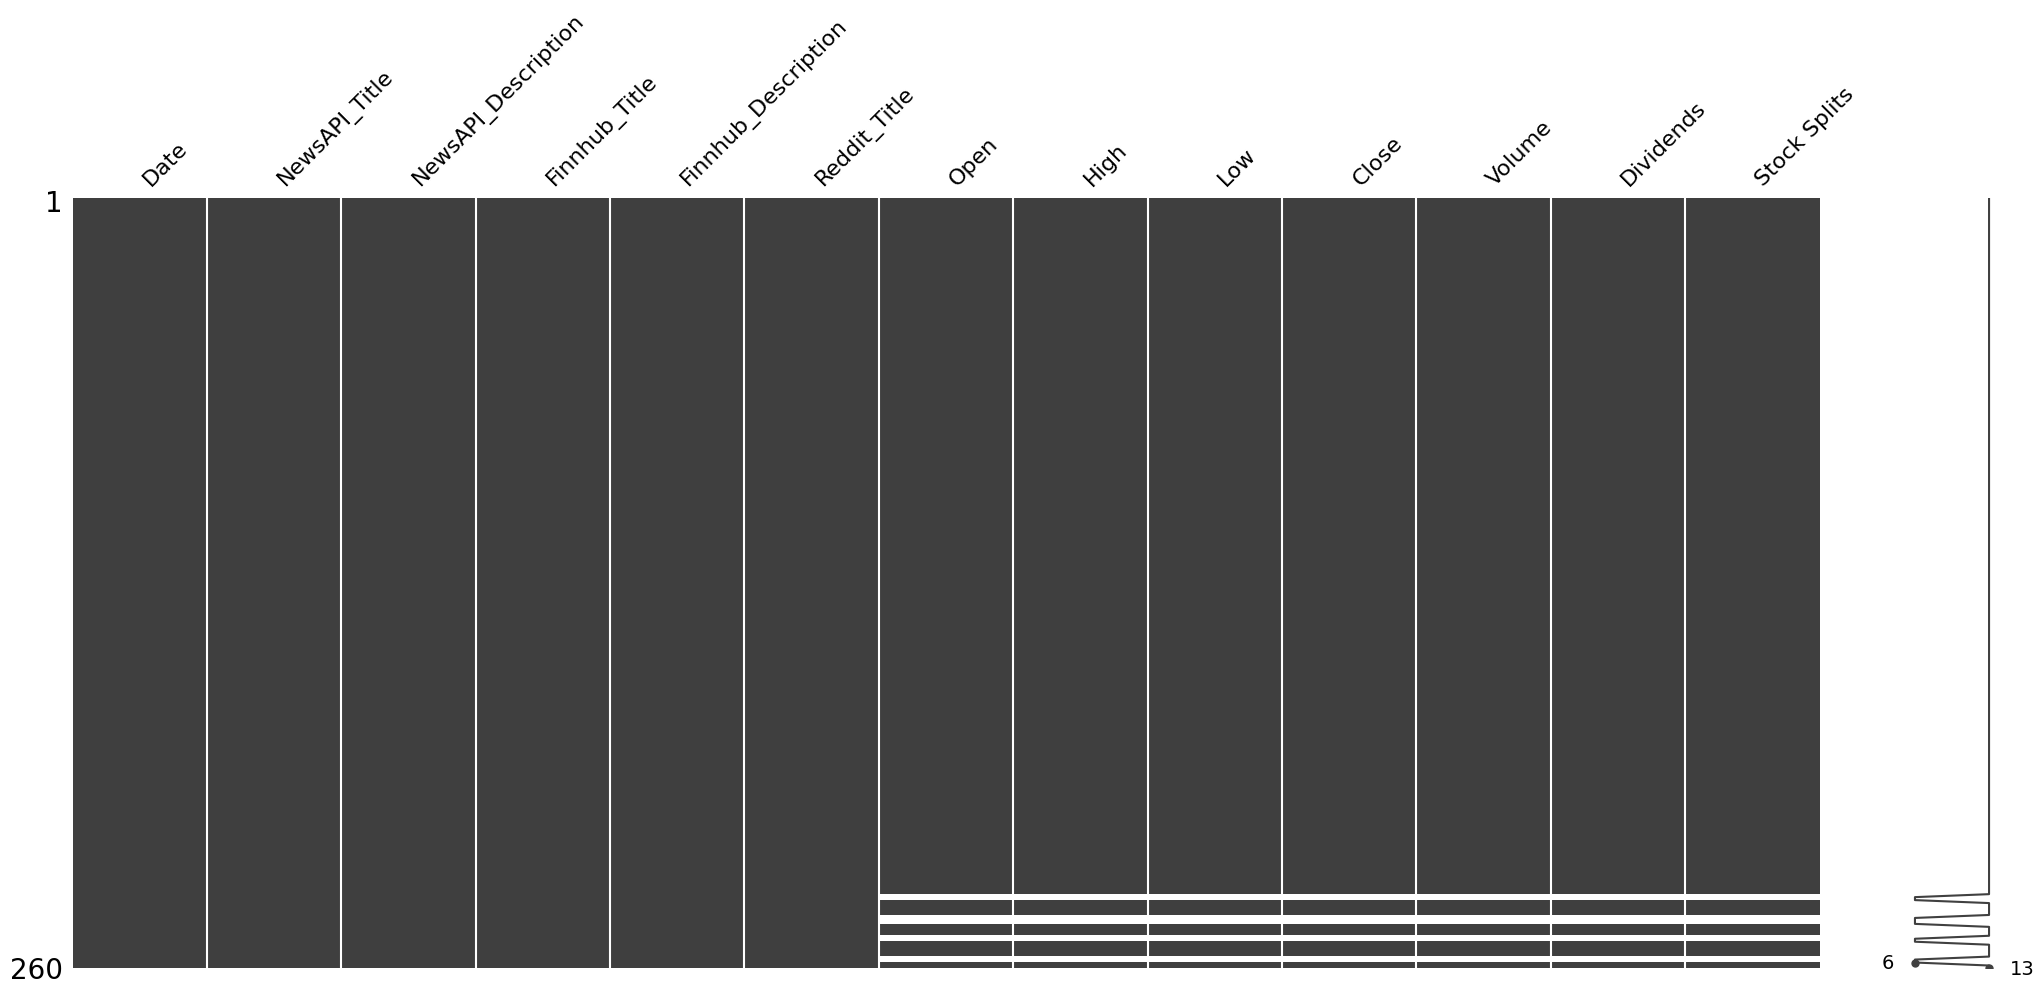

In [20]:
import missingno as msno
import matplotlib.pyplot as plt

# Assuming 'aggregated_df' is already defined from the previous code

# Create the msno plot
msno.matrix(aggregated_df)
plt.show()


In [21]:
aggregated_df.columns
aggregated_df.to_csv('aggregated_df.csv', index=False)


In [26]:
import nltk
import numpy as np
from google.colab import files
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Define function to get sentiment score
def get_sentiment(text):
  total_score = 0
  for i in text:
    if isinstance(i, str):# Ensure text is not NaN
      sentiment = sia.polarity_scores(i)  # Get sentiment scores
      total_score += sentiment['compound'] # Compound sentiment score
    return total_score/len(text)
  return np.nan

# Apply sentiment analysis to news columns
news_columns = ['NewsAPI_Title', 'NewsAPI_Description', 'Finnhub_Title', 'Finnhub_Description', 'Reddit_Title']
for col in news_columns:
    aggregated_df[f"{col}_sentiment"] = aggregated_df[col].apply(get_sentiment)

# Calculate daily average sentiment score
aggregated_df["avg_sentiment"] = aggregated_df[[f"{col}_sentiment" for col in news_columns]].mean(axis=1)

print(aggregated_df.head())
files.download('aggregated_df.csv')

        Date NewsAPI_Title NewsAPI_Description Finnhub_Title  \
0 2024-03-04            []                  []            []   
1 2024-03-05            []                  []            []   
2 2024-03-06            []                  []            []   
3 2024-03-07            []                  []            []   
4 2024-03-08            []                  []            []   

  Finnhub_Description Reddit_Title        Open        High         Low  \
0                  []           []  198.729996  199.750000  186.720001   
1                  []           []  183.050003  184.589996  177.570007   
2                  []           []  179.990005  181.580002  173.699997   
3                  []           []  174.350006  180.039993  173.699997   
4                  []           []  181.500000  182.729996  174.699997   

        Close       Volume  Dividends  Stock Splits  NewsAPI_Title_sentiment  \
0  188.139999  134334900.0        0.0           0.0                      0.0   
1  180.740

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>